In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
tickers = ("fb", "aapl", "amzn", "nflx", "googl")
dfs = dict()
models = dict()
scores = dict()

for i in tickers:
    dfs[i] = pd.read_csv(i+".csv", index_col = 0)

In [3]:
for i in tickers:

    df = dfs[i]
    
    X = df.drop(["signal", "Open", "High", "Low", "Close"], axis = 1)
    y = df['signal']
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, train_size = 0.6)
    
    SVM_model = SVC(gamma = 'auto')
    svc = SVM_model.fit(X_train, y_train)
    models[i] = svc
    scores[i] = SVM_model.score(X_test, y_test)

In [4]:
pd.Series(data = scores)

fb       0.503151
aapl     0.487256
amzn     0.505247
nflx     0.501532
googl    0.487298
dtype: float64

In [5]:
y_pred = pd.Series(svc.predict(X_test), index = y_test.index)

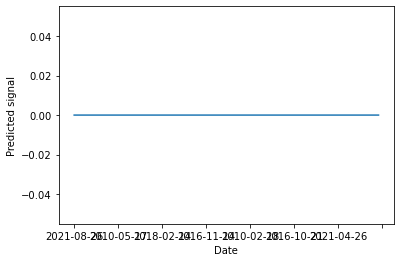

In [6]:
y_pred.plot()
plt.ylabel("Predicted signal")
plt.show()

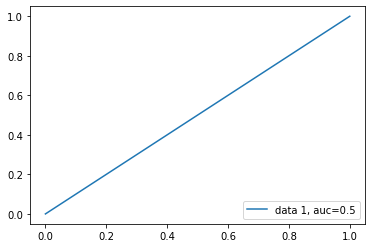

In [7]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label = "data 1, auc="+str(auc))
plt.legend(loc = 4)
plt.show()

In [8]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  0.5127020785219399
Mean Squared Error:  0.5127020785219399
Root Mean Squared Error:  0.7160321770157678
